In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import pearsonr

In [2]:
df = pd.read_csv('day.csv')
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [5]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


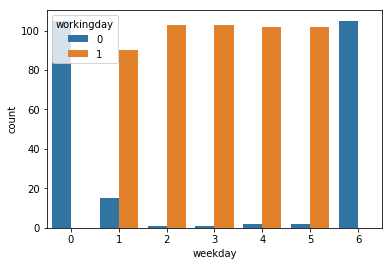

In [12]:
sb.countplot(x='weekday',data=df,hue='workingday')

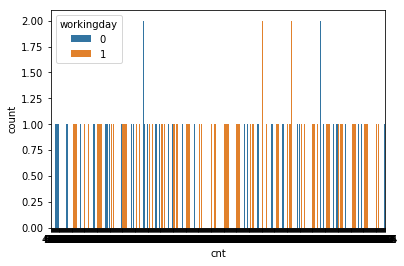

In [13]:
sb.countplot(x='cnt',data=df,hue='workingday')

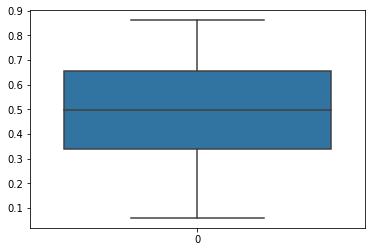

In [16]:
sb.boxplot(data=df['temp'])

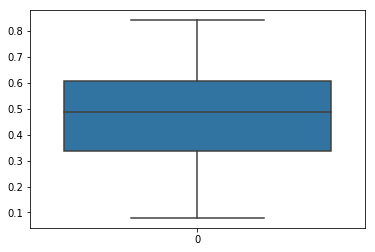

In [17]:
sb.boxplot(data=df['atemp'])

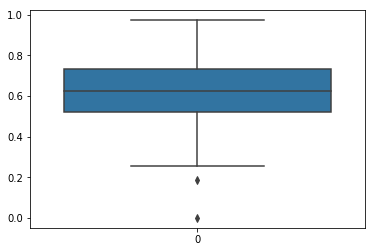

In [18]:
sb.boxplot(data=df['hum'])

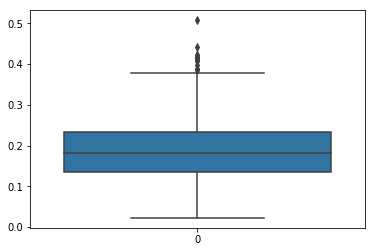

In [19]:
sb.boxplot(data=df['windspeed'])

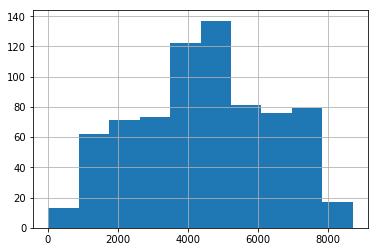

In [28]:
x = df['cnt']
x.hist()

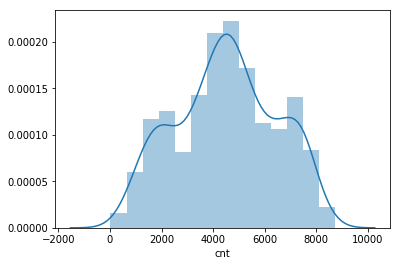

In [31]:
sb.distplot(x)

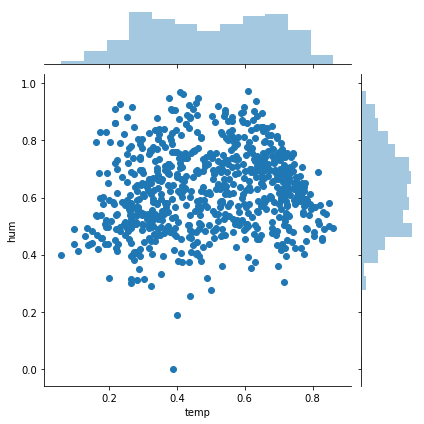

In [7]:
sb.jointplot(x='temp', y='hum',data=df, kind='scatter')

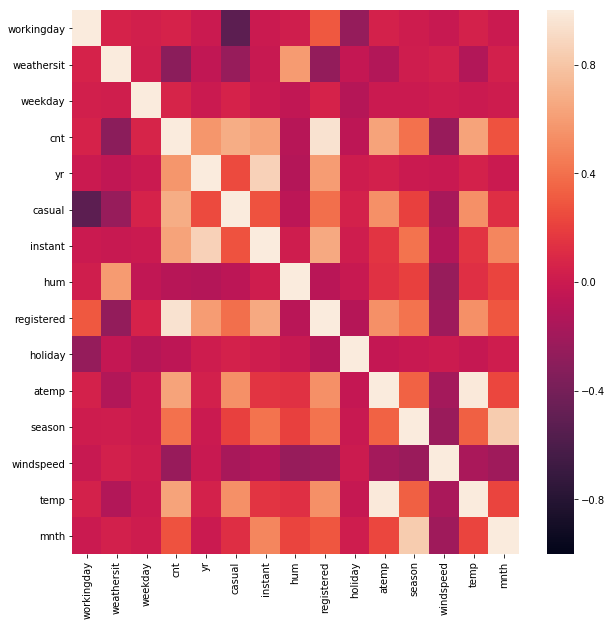

In [26]:
d = list(set(df.columns)-set(df['dteday']))
c = df[d].corr()
mp.figure(figsize=(10,10))
sb.heatmap(c,annot = False, vmin = -1 , vmax = 1)

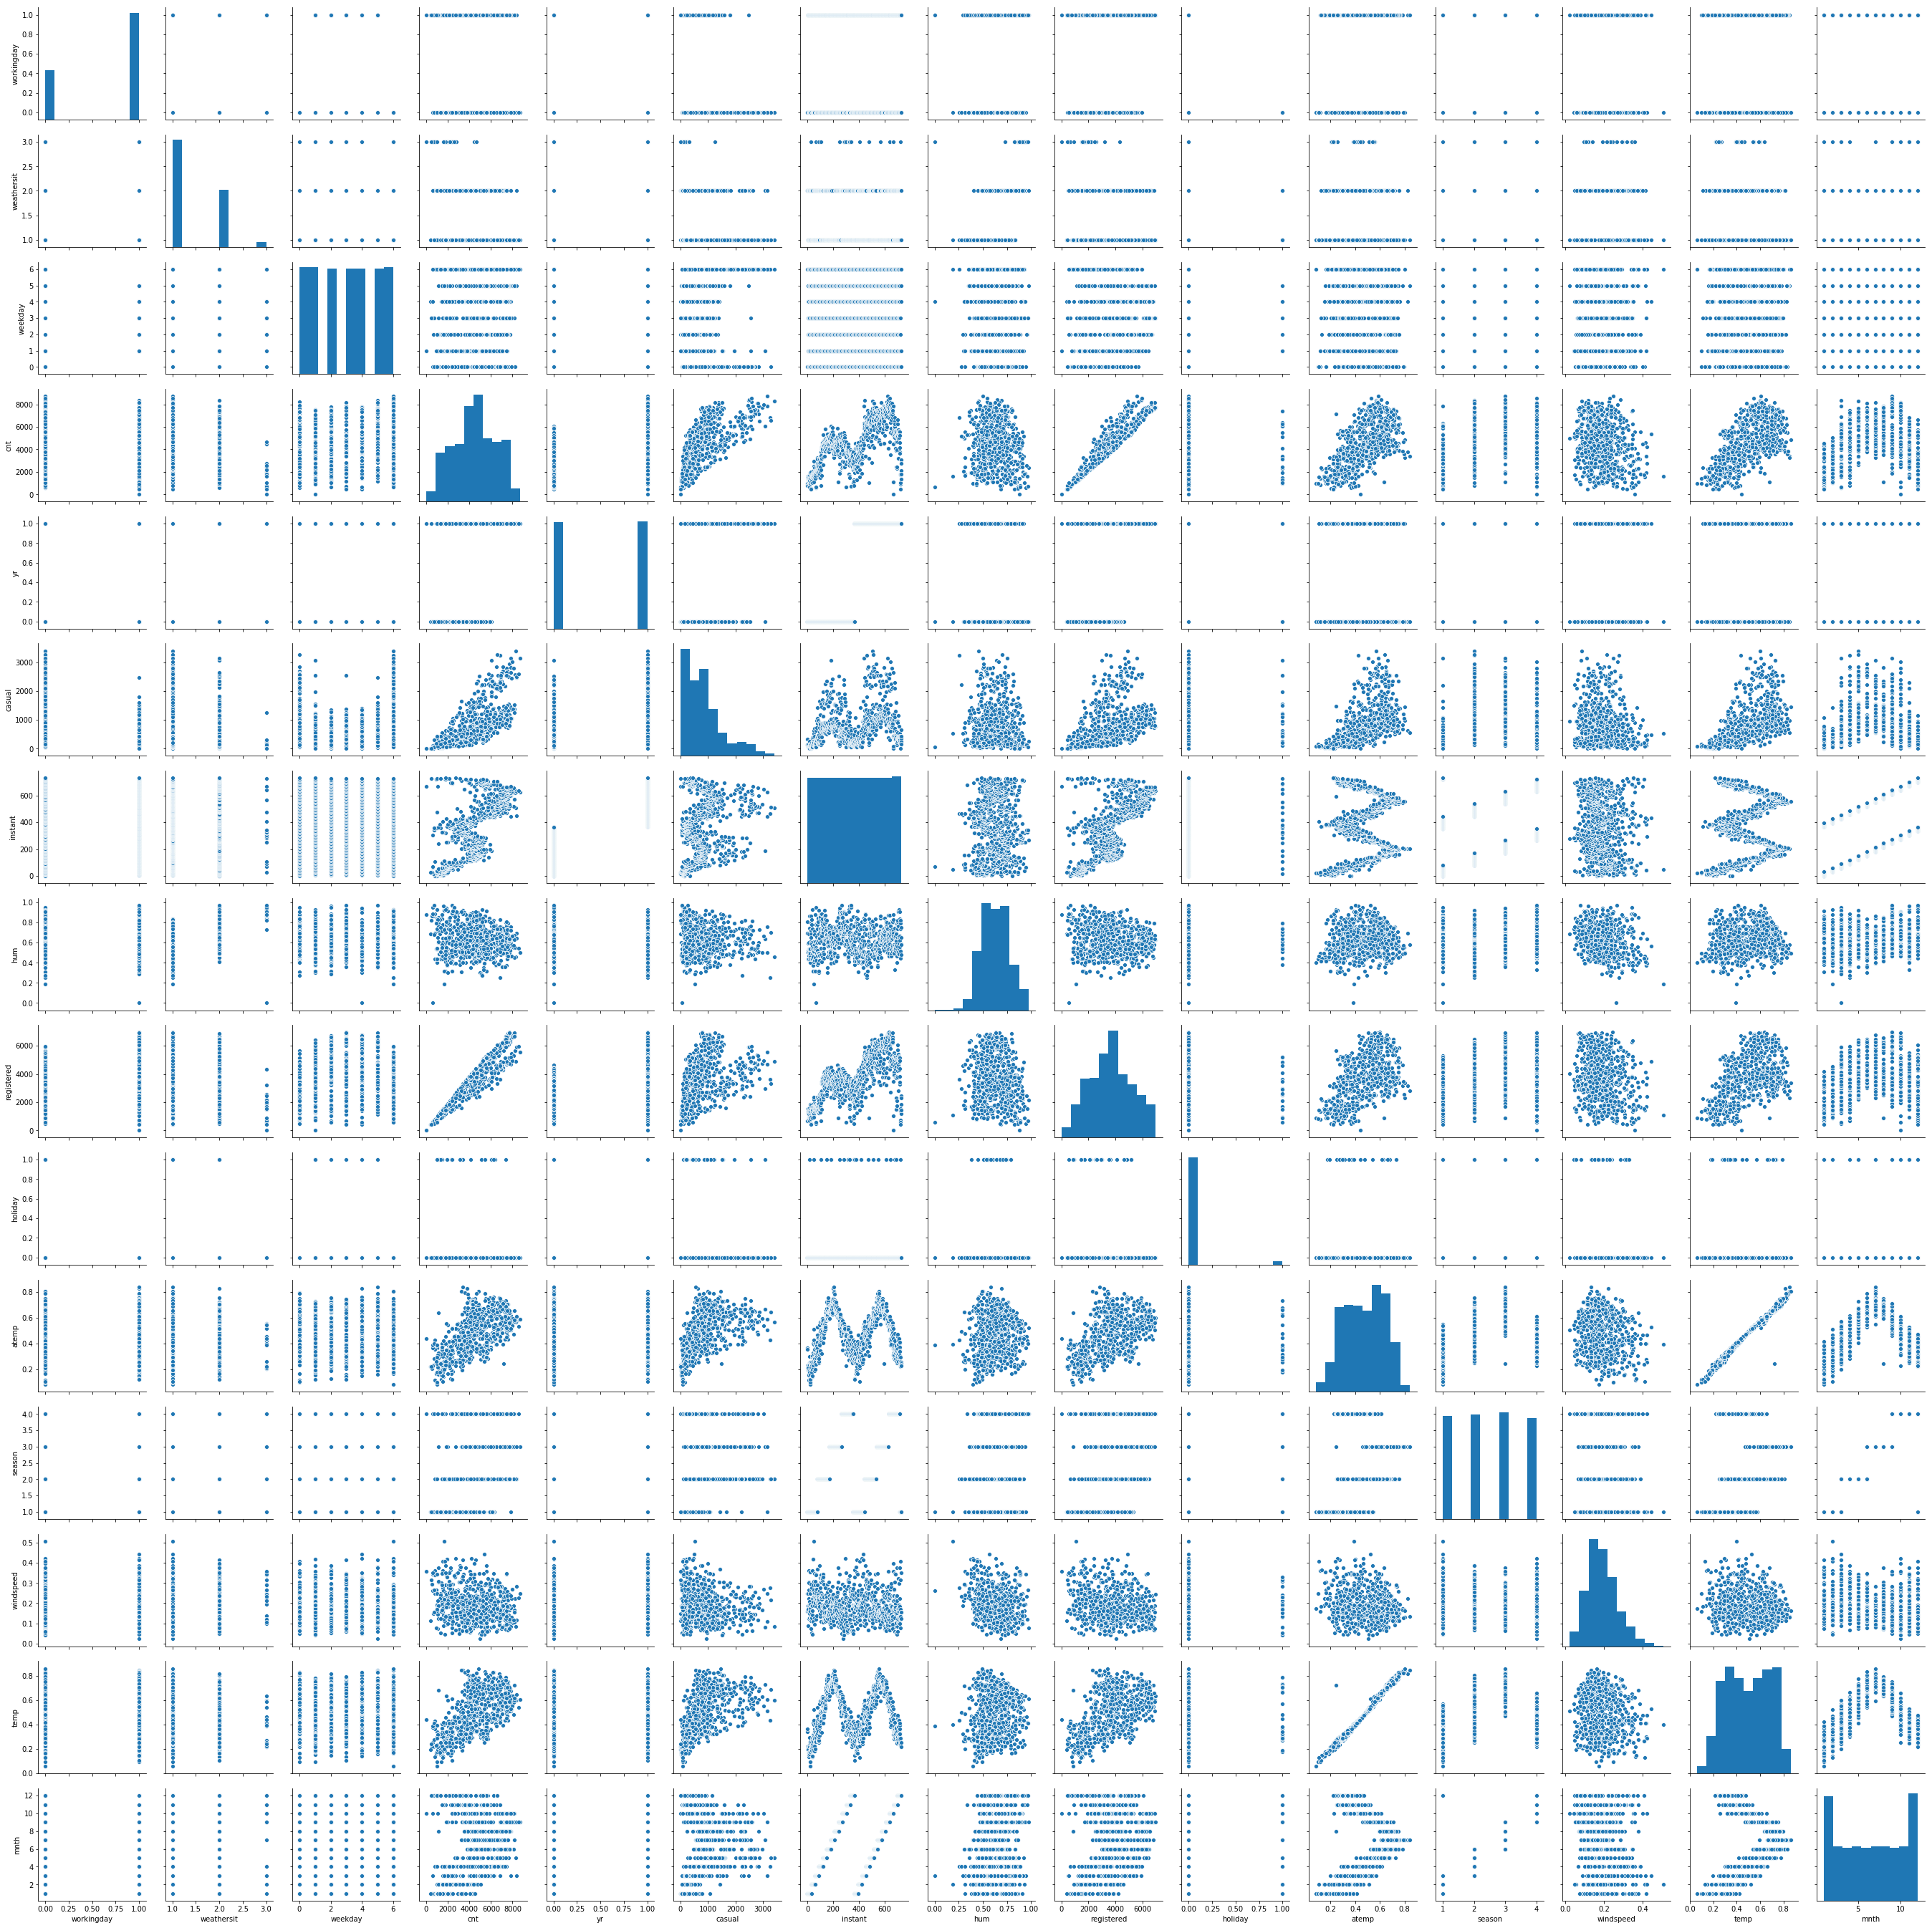

In [27]:
sb.pairplot(df[d])

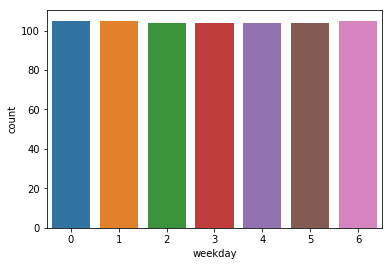

In [33]:
sb.countplot(x='weekday', data = df)

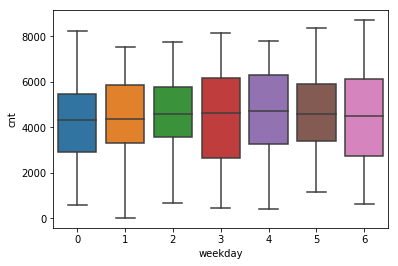

In [34]:
sb.boxplot(x='weekday',y='cnt',data = df)

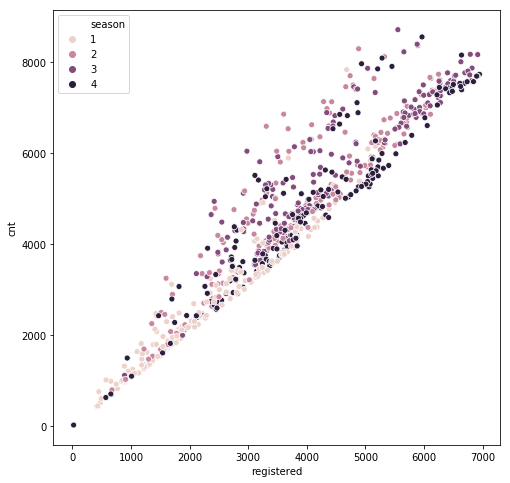

The Pearson Correlation Factor for the Columns Cnt and Registered is 0.9455169158090359


In [8]:
plt.figure(figsize=(8,8))
sb.scatterplot(x='registered',y='cnt',data=df,hue='season')
plt.show()
x=df['cnt']
y=df['registered']
r,p=pearsonr(x,y)
print("The Pearson Correlation Factor for the Columns Cnt and Registered is "+str(r))

The box plot of weekday and humidity shows that there may be some outliers present in the data.

With heat map of the data we can clearly see that the atemp and temp are very much co-related to each other.

Also, the scatterplot between count and registered also show quite some co-relation. thus this maens the column atemp can be dropped with keeping temp or vice-versa. same can be done with count and registered.